In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import time
import datetime 
import random
from scipy import stats


from IPython import display

**An online e-commerce company decides to provide fast shipping to customers. The management team wants to the impact of offering fast shipping to customers. Based on the observational data, how to measure the effect of adding the sales tag.**

> 1. Define Goal: 
>> The impact of providing fast shipping.

> 2. Identify Metric: 
>> check out rate or higher amount spent on customer

> 3. Develop Hypothesis:
>> The check out rate will drive up check out rate or higher amount spent on customer.

> 4. Set up the experiemnt:
>> set up the checkout page by providing faster shipping. we randomly separate users to treatment and control. The unit of analysis is user. This will ensure that consistent user experience to users. This will ensure that our experiment is trustworthy and independent assumption is not violated. 

> 5. Run the Experiment
>> Once the engineer implemented the changes and randomly assigned the users. Let the experiment run for a week. collect the consumer data and prepare the analysis. 

> 6. Analyze the result
>> Conduct T-Test and analyze the result. Since the simulated the data. we should be conculde that treatment will increase the conversion rate at the check out page.

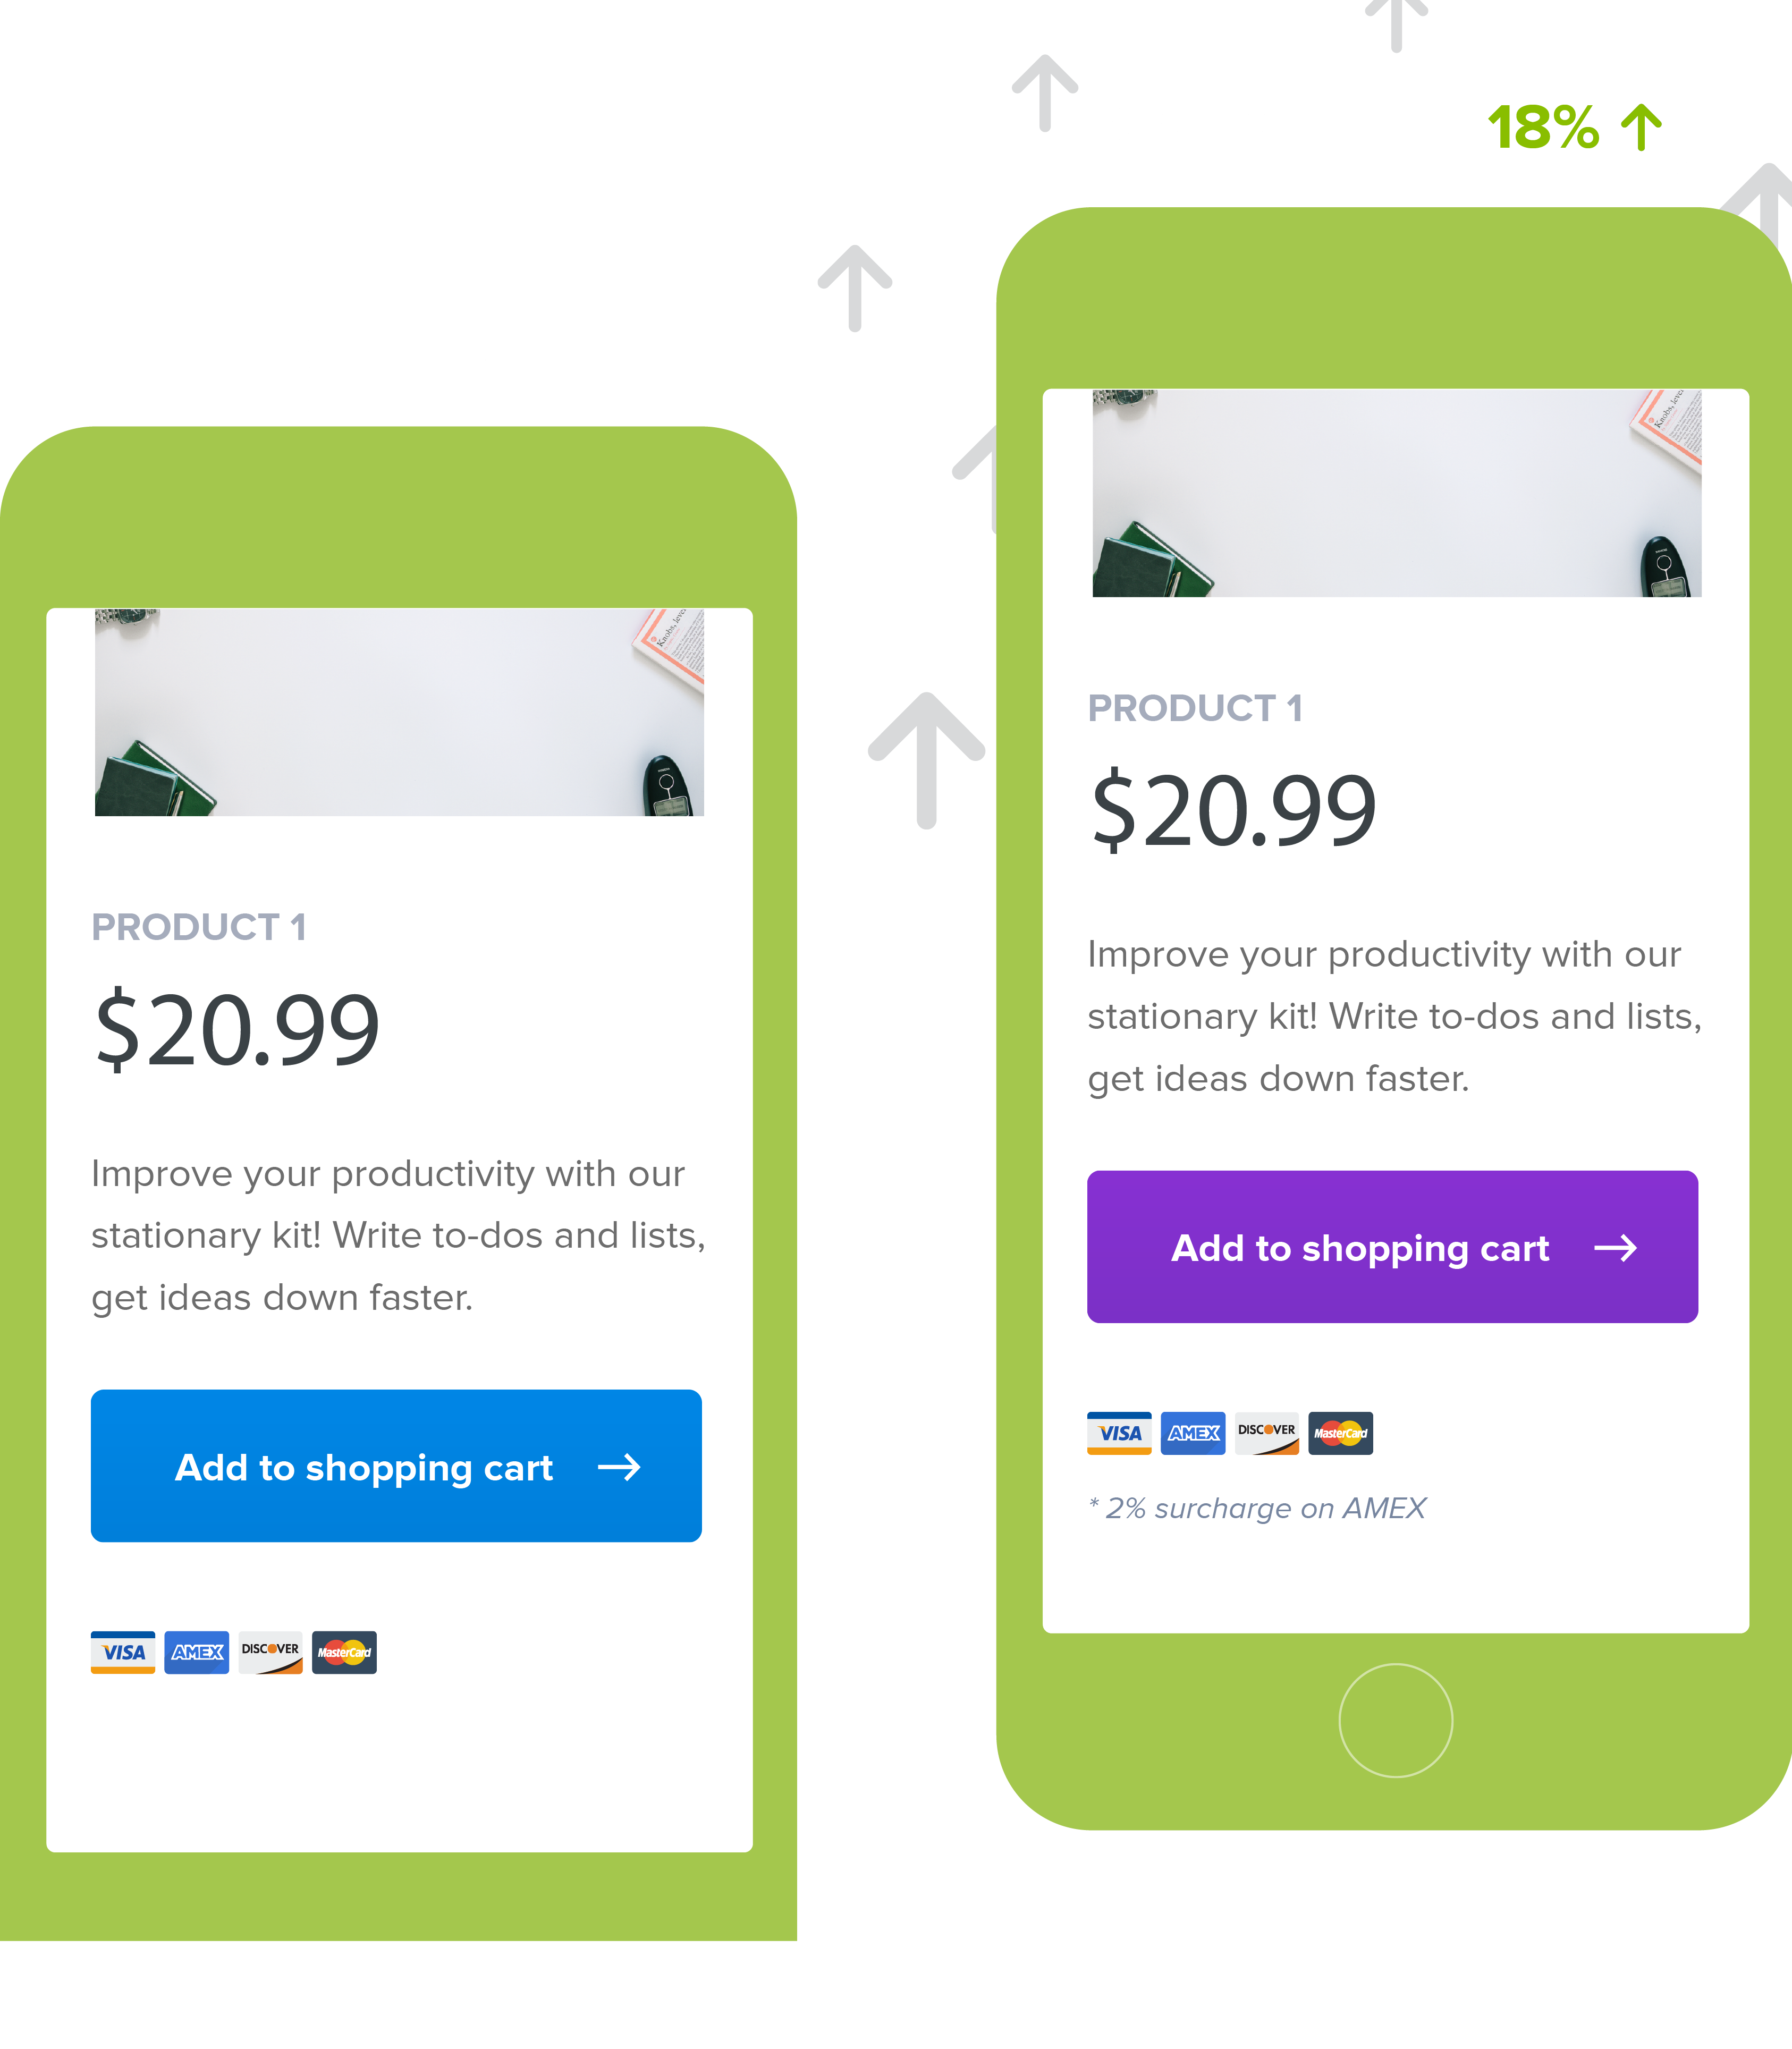

In [2]:
display.Image("abtesting.png",width=500, height=500)

In [3]:
d = {'Living Room Furniture': ['Sofas', 'Sectionals', 'Accent Chairs', 
                               'Coffee Tables', 'TV Stands', 'Chairs', 'Cabinets'], 
    
    'Bedroom Furniture':['Beds', 'Dressers', 'Nightstands', 'Bed Frames', 'Bedroom Sets'], 
    
    'Kitchens': ['Dining Tables', 'Dining Room Sets', 'Var Stools'],
    
    'Office': ['Desks', 'Bookcases', 'Office Chairs', 'Room Dividers'],
    
    'Mudroom':['Console Tables', 'Hall Trees'], 
    
    'Outdoor Furniture': ['Lounge Chairs', 'Patio Dining Sets', 'Porch Swings', 'Hammocks'],
    
    'Outdoor Shades': ['Gazebos', 'Pergolas', 'Canopies'],
    
    'Garden':['Planters', 'Trellises'],
    
    'Bedding':['Comforter', 'Duvet', 'Quilts', 'Blankets'], 
    
    'Ceiling Lighting':['Chandeliers', 'Flush Mount Lighting', 'Track Lighting'], 
    
    'Wall Lights':['Bathroom Vanity Lighting', 'Wall Sconces'], 
    
    'Kitchen Appliances': ['Refrigerators', 'Ranges', 'Mini Fridges', 'Dishwashers'], 
    
    'Washers & Dryers': ['Dryers', 'Washer'], 
    
    'Baby Furniture': ['Cribs', 'Toddler Beds', 'Crib Mattresses']}

df1 = pd.DataFrame(columns=['timestamp', 'userid', 'item', 'item category', 'price', 'test', 'Region','click'])
df2 = pd.DataFrame(columns=['timestamp', 'userid', 'item', 'item category', 'price', 'test', 'Region','click'])

In [4]:
current = datetime.datetime.strptime(time.ctime(), "%a %b %d %H:%M:%S %Y")

p_test = 0.03

p_control = 0.02

for i in range(0, 15000):
    
    
    timestamp = current -  datetime.timedelta(days = random.randrange(7),
                                              hours = random.randrange(12),
                                              minutes = random.randrange(30))
    
    userid = 'userid '+ str(random.randint(1, 500000)) 
    
    item_cat, item = random.choice(list(d.items()))
    
    mean_uniform = random.randint(a=30,b=100)
    
    std_uniform = random.randint(a=15, b=30)
    
    price = round(np.random.normal(mean_uniform, std_uniform),2)
    
    item_cat, item = random.choice(list(d.items()))

    item_cat, item = item_cat, random.choice(item)
    
    test = 1 if np.random.uniform() > 0.5 else 0

    temp = [timestamp.strftime("%b %d %Y - %H:%M:%S"), userid, item, item_cat, price, test]

    
    if test == 1:
        click = 1 if np.random.uniform() < p_test else 0
        temp.append('Region B')
        temp.append(click)
    
    elif test == 0: 
        click = 1 if np.random.uniform() < p_control else 0
        temp.append('Region A')
        temp.append(click)
        
    df2.loc[len(df2)] = temp

In [5]:
for i in range(0, 15000):
    
    
    timestamp = current -  datetime.timedelta(days = random.randint(a=7, b=14),
                                              hours = random.randrange(12),
                                              minutes = random.randrange(30))
    
    userid = 'userid '+ str(random.randint(1, 500000)) 
    
    item_cat, item = random.choice(list(d.items()))
    
    mean_uniform = random.randint(a=30,b=100)
    
    std_uniform = random.randint(a=15, b=30)
    
    price = round(np.random.normal(mean_uniform, std_uniform),2)
    
    item_cat, item = random.choice(list(d.items()))

    item_cat, item = item_cat, random.choice(item)
    
    test = 1 if np.random.uniform() > 0.5 else 0

    temp = [timestamp.strftime("%b %d %Y - %H:%M:%S"), userid, item, item_cat, price, test]

    
    if test == 1:
        click = 1 if np.random.uniform() < p_control else 0
        temp.append('Region A')
        temp.append(click)
    
    elif test == 0: 
        click = 1 if np.random.uniform() < p_control else 0
        temp.append('Region B')
        temp.append(click)
        
    df1.loc[len(df1)] = temp
    


In [6]:
df1['click'] = pd.to_numeric(df1['click'])
df2['click'] = pd.to_numeric(df2['click'])
df1['Amount Spent'] = df1['click'] * df1['price']
df2['Amount Spent'] = df2['click'] * df2['price']

df1['Amount Spent'] = pd.to_numeric(df1['Amount Spent'])
df2['Amount Spent'] = pd.to_numeric(df2['Amount Spent'])

df1 = df1.sort_values('timestamp')
df1.reset_index()
df1.head()

,timestamp,userid,item,item category,price,test,Region,click,Amount Spent
11224,Jan 06 2021 - 04:47:54,userid 4015,Room Dividers,Office,41.79,1,Region A,0,0.0
47,Jan 06 2021 - 04:47:54,userid 392455,Canopies,Outdoor Shades,50.46,0,Region B,0,0.0
2443,Jan 06 2021 - 04:47:54,userid 425976,Refrigerators,Kitchen Appliances,79.81,1,Region A,0,0.0
7361,Jan 06 2021 - 04:47:54,userid 211008,Pergolas,Outdoor Shades,87.51,1,Region A,0,0.0
8715,Jan 06 2021 - 04:48:54,userid 118949,Desks,Office,95.10,0,Region B,0,0.0


In [7]:
df2 = df2.sort_values('timestamp')
df2.reset_index()

df2.head()

,timestamp,userid,item,item category,price,test,Region,click,Amount Spent
4789,Jan 14 2021 - 04:47:54,userid 410144,Bookcases,Office,100.93,0,Region A,0,0.0
7235,Jan 14 2021 - 04:47:54,userid 169604,Bathroom Vanity Lighting,Wall Lights,-8.42,0,Region A,0,-0.0
13850,Jan 14 2021 - 04:47:54,userid 499886,Porch Swings,Outdoor Furniture,82.71,0,Region A,0,0.0
12907,Jan 14 2021 - 04:47:54,userid 469900,Hall Trees,Mudroom,96.76,0,Region A,0,0.0
6726,Jan 14 2021 - 04:48:54,userid 122705,Wall Sconces,Wall Lights,82.37,1,Region B,0,0.0


In [8]:
test = df2.loc[df2.test == 1]
control = df2.loc[df2.test == 0]



In [9]:
test_agg = test.groupby('userid') \
       .agg({'click':'mean'}).reset_index()

control_agg  = control.groupby('userid') \
       .agg({'click':'mean'}).reset_index()

> Let us take a look at the conversion rate at the check out page.

> Conduct the t test to see the result we receive is statisically significant.

>> Offering fast shipping option did increase the conversion rate 

In [10]:
cal_diff = test_agg['click'].mean() - control_agg['click'].mean()
print('The observable difference is',cal_diff, '\n')
t2, p2 = stats.ttest_ind(test_agg['click'],control_agg['click'])
print("t = " + str(t2))
print("p = " + str(p2))

The observable difference is 0.011017251586978825 

t = 4.501012800682552
p = 6.814326182807689e-06


> Let us take a look at the conversion rate at the check out page.

In [11]:
DID = pd.concat([df1.groupby('Region').agg({'click':'mean'}).reset_index(),
          df2.groupby('Region').agg({'click':'mean'}).reset_index()], axis = 0)
DID['Period'] = ['Week 1', 'Week 1', 'Week 2','Week 2']
pivot = DID.pivot(index = 'Period', columns = 'Region', values='click')
pivot

Region,Region A,Region B
Period,,
Week 1,0.020580,0.019556
Week 2,0.017423,0.028691


In [12]:
pivot.iloc[1,1]-pivot.iloc[0,1] - (pivot.iloc[1,0]-pivot.iloc[0,0])

0.01229159779366554

> Let us take a look at the average dollar spent per user at the check out page.

> Conduct the t test to see the result we receive is statisically significant.

>> Offering fast shipping option did increase the average dollar spent per user

In [13]:
test_agg = test.groupby('userid') \
       .agg({'Amount Spent':'mean'}).reset_index()

control_agg  = control.groupby('userid') \
       .agg({'Amount Spent':'mean'}).reset_index()


In [14]:
cal_diff = test_agg['Amount Spent'].mean() - control_agg['Amount Spent'].mean()
print('The observable difference is',cal_diff, '\n')
t2, p2 = stats.ttest_ind(test_agg['Amount Spent'],control_agg['Amount Spent'])
print("t = " + str(t2))
print("p = " + str(p2))

The observable difference is 0.8083772007326282 

t = 4.497507295345052
p = 6.927460129975108e-06


In [17]:
DID = pd.concat([df1.groupby('Region').agg({'Amount Spent':'mean'}).reset_index(),
          df2.groupby('Region').agg({'Amount Spent':'mean'}).reset_index()], axis = 0)

DID['Period'] = ['Week 1', 'Week 1', 'Week 2','Week 2']

pivot = DID.pivot(index = 'Period', columns = 'Region', values='Amount Spent')
pivot

Region,Region A,Region B
Period,,
Week 1,1.339524,1.189280
Week 2,1.121007,1.945136


In [16]:
pivot.iloc[1,1]-pivot.iloc[0,1] - (pivot.iloc[1,0]-pivot.iloc[0,0])

0.9743728744734406